In [1]:
%matplotlib inline


# SVM Margins Example

The plots below illustrate the effect the parameter `C` has
on the separation line. A large value of `C` basically tells
our model that we do not have that much faith in our data's
distribution, and will only consider points close to line
of separation.

A small value of `C` includes more/all the observations, allowing
the margins to be calculated using all the data in the area.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn import svm
from ipywidgets import interact

In [33]:
np.random.seed(1)
n_points = 4
separation = 2
X = np.r_[np.random.randn(n_points, 2) + [separation, 0], np.random.randn(n_points, 2) + [-separation, 0]]
Y = [0] * n_points + [1] * n_points
def svm_penalty(penalty = 0.6):
    clf = svm.SVC(kernel='linear', C=penalty, gamma = 10)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    b = -(clf.intercept_[0]) / w[1]
    yy = a * xx + b
    colr = ['b', 'r']

    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(0, figsize=(6, 6))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(X[:, 0], X[:, 1], c = [colr[i] for i in Y], zorder=10, s=50, cmap=plt.cm.Paired, edgecolors='k')
    xy_bounded = []
    xy_free = []
    for i, (xs, ys) in enumerate(clf.support_vectors_):
        plt.annotate("{:.2f}".format(clf.dual_coef_[0][i]), xy=(xs, ys), xytext=(5,10), textcoords='offset points')
        if abs(clf.dual_coef_[0,i]) == penalty:
            xy_bounded.append((xs, ys, Y[clf.support_[i]]))
        else:
            xy_free.append((xs, ys, Y[clf.support_[i]]))          
            
    if xy_bounded: plt.scatter(list(zip(*xy_bounded))[0], list(zip(*xy_bounded))[1], c = 'yellow',
                               cmap=plt.cm.Paired, s=300, zorder=9, edgecolors='k')       
    if xy_free: plt.scatter(list(zip(*xy_free))[0], list(zip(*xy_free))[1], c = 'orange',
                               cmap=plt.cm.Paired, s=200, zorder=9, edgecolors='k')
    
    scale_range = 4
    x_min = y_min = - scale_range
    x_max = y_max = scale_range

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    line1 = plt.Line2D([0], [0], ls ='solid', color='k', label='Separation Plane')
    line2 = plt.Line2D([0], [0], ls ='dashed', color='k', label='Margin')
    line3 = plt.Line2D([0], [0], marker='o', markersize=15, markeredgecolor='k', 
                       color='yellow', linestyle = 'None', label='Bounded Support Vec.')
    line4 = plt.Line2D([0], [0], marker='o', markersize=12, markeredgecolor='k', 
                       color='orange', linestyle = 'None', label='Free Support Vec.')
    plt.legend(handles = [line1,line2,line3,line4], loc=1)
    plt.show()
#     print(margin)
#     print(clf.n_support_)
#     print(clf.coef_)
#     print(clf.dual_coef_)
#     return clf
#     print(clf.dual_coef_.sum())
#     print(a)
#     print(b)

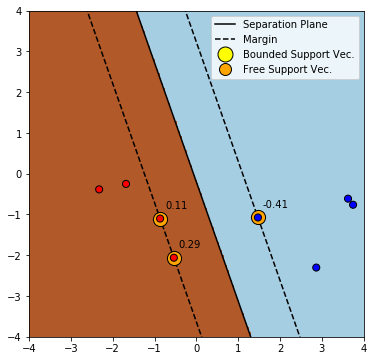

In [35]:
interact(svm_penalty, penalty=(0.01,100000,0.01));

In [540]:
np.random.seed(1)
n_points = 20
separation = 1
X = np.r_[np.random.randn(n_points, 2) + [separation, 0], np.random.randn(n_points, 2) + [-separation, 0]]
Y = [0] * n_points + [1] * n_points

def svm_rbf(penalty = 0.6, gamma = 10):
    clf = svm.SVC(kernel='rbf', C=penalty, gamma = gamma)
    clf.fit(X, Y)
    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(0, figsize=(6, 6))
    plt.clf()

    xy_bounded = []
    xy_free = []
    for i, (xs, ys) in enumerate(clf.support_vectors_):
        if abs(clf.dual_coef_[0,i]) == penalty:
            xy_bounded.append((xs, ys, Y[clf.support_[i]]))
        else:
            xy_free.append((xs, ys, Y[clf.support_[i]]))          
            
    if xy_bounded: plt.scatter(list(zip(*xy_bounded))[0], list(zip(*xy_bounded))[1], c = 'yellow',
                               cmap=plt.cm.Paired, s=300, zorder=9, edgecolors='k')       
    if xy_free: plt.scatter(list(zip(*xy_free))[0], list(zip(*xy_free))[1], c = 'orange',
                               cmap=plt.cm.Paired, s=200, zorder=9, edgecolors='k')
    
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')

    x_min = y_min = -5
    x_max = y_max = 5

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()
    print(clf.n_support_)
    print(clf.dual_coef_)
    print(clf.dual_coef_.sum())

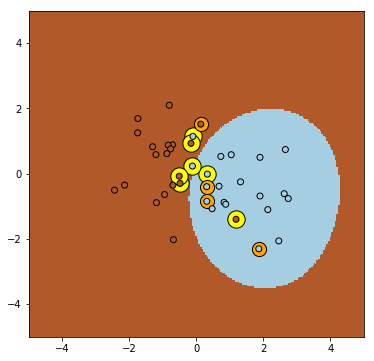

[6 5]
[[ -3.83917629 -10.          -8.71712549  -4.99278354 -10.         -10.
   10.          10.          10.           7.54908532  10.        ]]
-7.1054273576e-15


In [543]:
interact(svm_rbf, penalty=(0.01,10,0.1), gamma=(.1,10,.1))